#Thompson Sampling & Upper Confidence Bound

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Dataset = pd.read_csv('Ads.csv')

#Thompson Sampling Algo

In [57]:
import random
N1 = 10000
d1 = 10
f = []
P1 = [0] * d1
P0 = [0] * d1
Total_1 = 0

for i in range(0, N1):
  ad_1 = 0
  rand_max = 0
  for j in range(0, d1):
    rand = random.betavariate(P1[j] + 1, P0[j] + 1)
    if (rand > rand_max):
      rand_max = rand
      ad_1 = j

  f.append(ad_1)
  P = Dataset.values[i, ad_1]

  if (P == 1):
    P1[ad_1] = P1[ad_1] + 1
  else:
    P0[ad_1] = P0[ad_1] + 1

  Total_1 = Total_1 + P

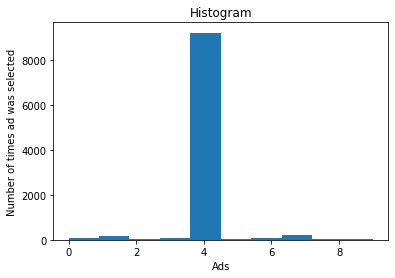

In [58]:
plt.hist(f)
plt.title('Histogram')
plt.xlabel('Ads')
plt.ylabel('Number of times ad was selected')
plt.show()

#Upper Confidence Bound Algo

In [59]:
import math
N2 = 10000
d2 = 10
Z = []
#Number of Selections
Q1 = [0] * d

#Sum of Rewards
Q2 = [0] * d

Total_2 = 0
for i in range(0, N2):
  ad_2 = 0
  upper_bound_max = 0

  for j in range(0, d2):
    if (Q1[j] > 0):
      Avg = Q2[j] / Q1[j]
      delta = math.sqrt(3/2 * math.log(i + 1) / Q1[j])
      upper_bound = Avg + delta
    else:
      upper_bound = 1e400

    if (upper_bound > upper_bound_max):
      upper_bound_max = upper_bound
      ad_2 = j

  Z.append(ad_2)

  Q1[ad_2] = Q1[ad_2] + 1
  Q = Dataset.values[i, ad_2]
  Q2[ad_2] = Q2[ad_2] + Q
  Total_2 = Total_2 + Q

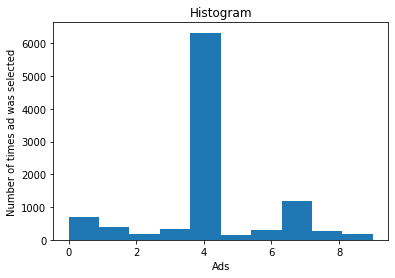

In [60]:
plt.hist(Z)
plt.title('Histogram')
plt.xlabel('Ads')
plt.ylabel('Number of times ad was selected')
plt.show()